## **Predicting Nationality of Individuals Using their Names with ML**
**Steps**
**(1) a dataset of firstnames**
 **(2) a dataset of lastnames**

In [204]:
import pandas as pd  # Data manipulation library
import numpy as np   # Numerical operations library
import io           # Input/Output tools
import xgboost as xgb  # XGBoost library for gradient boosting

In [205]:
# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [206]:
# Load Dataset
#url="https://raw.githubusercontent.com/Hritaku/Python-Machine-Learning-Miniproject/master/Predicting_Nationality_Ethnicity_with_Names_Using_ML/Names_Dataset.csv"
#df = pd.read_csv(url)

 **DATASET**

**The datasets I used were from [Github](https://github.com/d4em0n/nationality-classify)
. The original author crawled the name data from Wikipedia. Each dataset contains numerous
names of people coming from the same nationality. In total, there are 18 nationalities (Russia, China, Korea, Poland, Scotland, Italy, US/UK, France, Japan, Greece, Spanish, India,
Turkey, Indonesia, Vietnam, Czech Republic) with a total of 140137 names. Since the data
distribution (number of data entry per country) is close to uniform (each nationality contains around 7500 names), there was no need to clean the datasets.**

In [207]:
# Uploading new dataset
#file_path = 'new.csv'

**Reading the dataset named "new.csv"**

In [208]:
# Reading dataset
df = pd.read_csv('new.csv')

In [209]:
df.shape

(140316, 2)

In [210]:
df.head()

,Names,Nationality
0,seika yokomoto,Japan
1,kirmen bilvin,Turkish
2,laura michelle heidl,Czech
3,sechelsk gorka,Polish
4,u junghua,Korean


In [211]:
df.columns

Index(['Names', 'Nationality'], dtype='object')

In [212]:
df['Nationality'].unique()

array(['Japan', 'Turkish', 'Czech', 'Polish', 'Korean', 'Scottish',
       'France', 'Italian', 'China', 'Dutch', 'Spanish', 'Vietnam',
       'Greece', 'India', 'UK', 'Arabic', 'Russian', 'Indonesia'],
      dtype=object)

In [213]:
class_names = ['Russian','China','Arabic','Dutch','Korean','Polish','Scottish','Italian','UK','France','Japan','Greece','Spanish','India','Turkish','Indonesia','Vietnam','Czech']

In [214]:
len(class_names)

18

In [215]:
df.groupby('Nationality')['Names'].size()

Nationality
Arabic       7834
China        7734
Czech        7836
Dutch        7866
France       7851
Greece       7849
India        7752
Indonesia    7872
Italian      7818
Japan        7907
Korean       7871
Polish       7835
Russian      7812
Scottish     7896
Spanish      7796
Turkish      7887
UK           7880
Vietnam      7020
Name: Names, dtype: int64

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Nationality'>

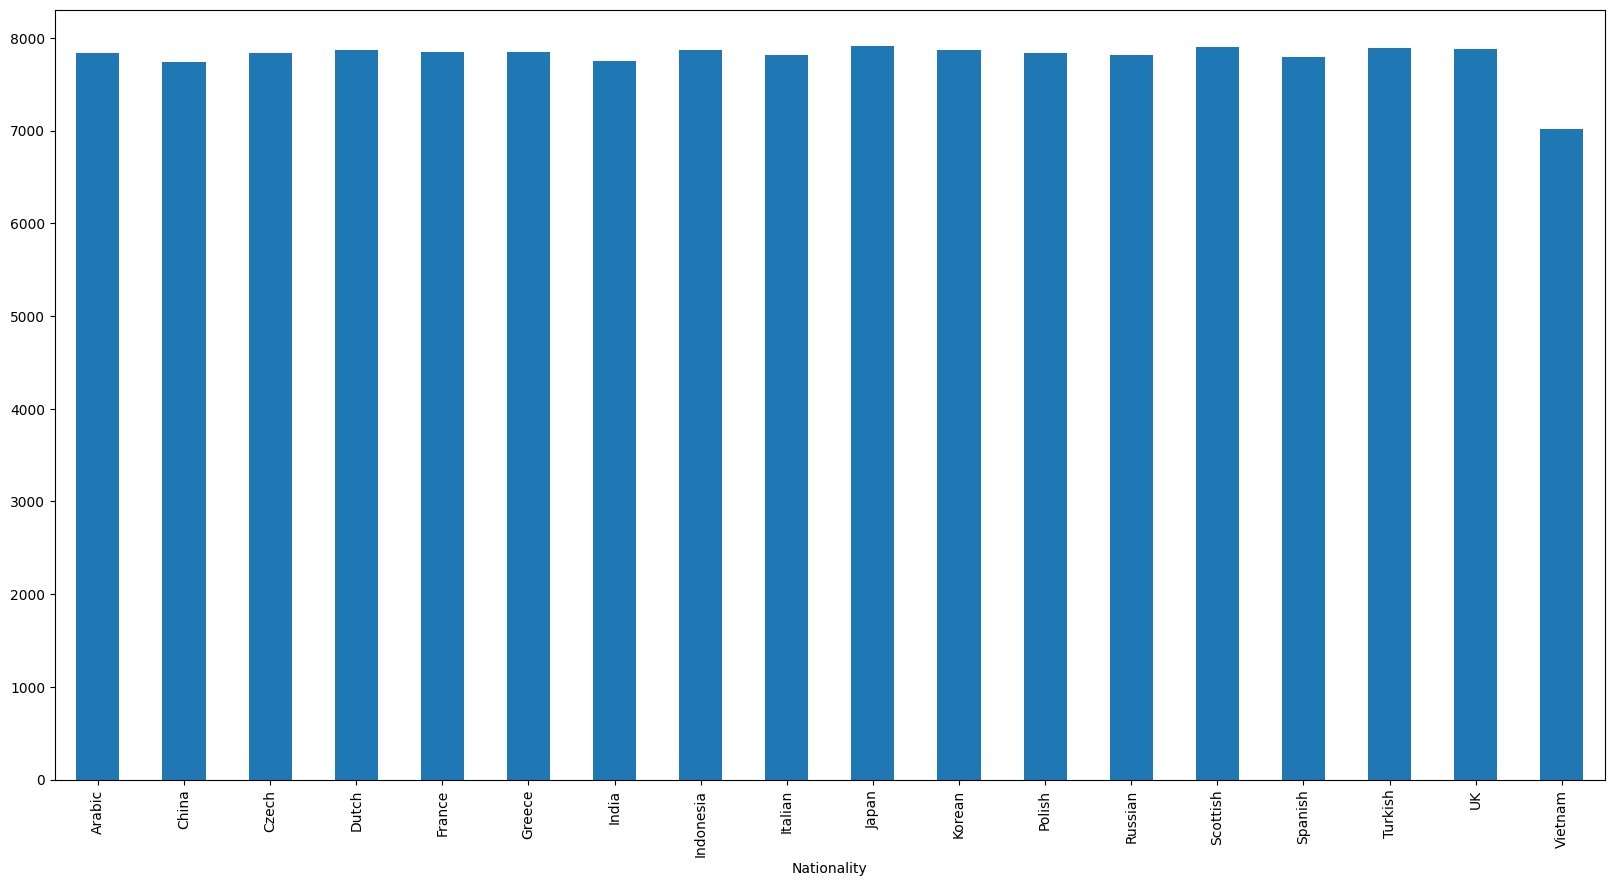

In [217]:
df.groupby('Nationality')['Names'].size().plot(kind='bar',figsize=(20,10))

In [218]:
# Features
Xfeatures = df['Names']#input features
ylabels= df['Nationality']#target values

In [219]:
# Vectorize Features
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [220]:
cv.get_feature_names_out()

array(['aa', 'aaban', 'aabha', ..., 'zyva', 'zywiyask', 'zzoha'],
      dtype=object)

In [221]:
# Save Our Vectorizer
import joblib

In [222]:
nationality_vectorizer = open("nationality_vectorizer.pkl","wb")
joblib.dump(cv,nationality_vectorizer)

In [223]:
nationality_vectorizer.close()

In [224]:
# Split Dataset into Train/Test
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.2,random_state=42)

In [225]:
#build model
nv = MultinomialNB()

In [226]:
#Train the model
nv.fit(x_train,y_train)

MultinomialNB()

In [227]:
# Accuracy of Our Model
nv.score(x_test,y_test)

0.8674814709236032

In [228]:
sample1 = ["krishna"]

In [229]:
vect1 = cv.transform(sample1).toarray()

In [230]:
nv.predict(vect1)

array(['India'], dtype='<U9')

In [231]:
sample2= ["vipond rodden","chinnadurai itty","constance andrews","Le Van Ky Du"]

In [232]:
vect2 = cv.transform(sample2).toarray()

In [233]:
nv.predict(vect2)

array(['France', 'India', 'UK', 'Vietnam'], dtype='<U9')

In [234]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(x_train,y_train)

/Users/sahilkhatri/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
logit.score(x_test,y_test)

0.9165835233751425

In [236]:
# Single Prediction with Logit
logit.predict(vect1)

array(['India'], dtype=object)

In [237]:
# Multiple Prediction
logit.predict(vect2)

array(['France', 'India', 'UK', 'Vietnam'], dtype=object)

In [238]:
sample_3 = ["ajten chalupka","finn mcphee"]

In [239]:
vect3 = cv.transform(sample_3).toarray()

In [240]:
# Interpretation of Model

In [241]:
logit.predict(vect3)

array(['Czech', 'Scottish'], dtype=object)

In [242]:
# Initialize DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

In [243]:
# Train the decision tree model
dt_model.fit(x_train, y_train)

/Users/sahilkhatri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sahilkhatri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier(random_state=42)

In [244]:
# Make predictions on the test set
y_pred = dt_model.predict(x_test)

In [245]:
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8070481755986317


In [246]:
# Predict for vect1, vect2, vect3
vect1_pred1 = dt_model.predict(vect1)
vect2_pred1 = dt_model.predict(vect2)
vect3_pred1 = dt_model.predict(vect3)

In [247]:
#printing predictions for decison trree
print(f"Prediction for vect1: {vect1_pred1}")
print(f"Prediction for vect2: {vect2_pred1}")
print(f"Prediction for vect3: {vect3_pred1}")
print("\n")

Prediction for vect1: ['India']
Prediction for vect2: ['France' 'India' 'UK' 'Vietnam']
Prediction for vect3: ['Czech' 'Scottish']




In [248]:
# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(ylabels)

In [249]:
# Split Dataset into Train/Test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [250]:
# Create an XGBoost classifier
xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(class_names),
                           colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)


In [251]:
# Fit the model to the training data
xg_clf.fit(x_train1, y_train1)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=18, ...)

In [252]:
y_pred = xg_clf.predict(x_test1)

In [253]:
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test1, y_pred)
print(f"XG boost accuracy: {accuracy}")

XG boost accuracy: 0.29913768529076395


In [254]:
# Make predictions for vect1, vect2, vect3
y_pred_vect1 = xg_clf.predict(vect1)
y_pred_vect2 = xg_clf.predict(vect2)
y_pred_vect3 = xg_clf.predict(vect3)

In [255]:
# Convert the predicted labels back to original string labels
y_pred_vect1_labels = label_encoder.inverse_transform(y_pred_vect1)
y_pred_vect2_labels = label_encoder.inverse_transform(y_pred_vect2)
y_pred_vect3_labels = label_encoder.inverse_transform(y_pred_vect3)

In [256]:
# Print the predicted nationality labels
print("Predicted nationality for vect1:", y_pred_vect1_labels)
print("Predicted nationality for vect2:", y_pred_vect2_labels)
print("Predicted nationality for vect3:", y_pred_vect3_labels)

Predicted nationality for vect1: ['Russian']
Predicted nationality for vect2: ['Russian' 'Russian' 'Russian' 'Russian']
Predicted nationality for vect3: ['Russian' 'Russian']


In [257]:
# Build K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()

In [258]:
# Fit the model
knn_model.fit(x_train, y_train)

/Users/sahilkhatri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sahilkhatri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier()

In [259]:

# Evaluate the model
accuracy = knn_model.score(x_test, y_test)
print(f'Accuracy (K-Nearest Neighbors): {accuracy}')

Accuracy (K-Nearest Neighbors): 0.7783637400228051


In [260]:
# Predict nationality using K-Nearest Neighbors
knn_pred_v1 = knn_model.predict(vect1)
knn_pred_v2 = knn_model.predict(vect2)

In [261]:
#Prediction using KNN regression
print("\nK-Nearest Neighbors Predictions:")
print("Prediction for vect1:", knn_pred_v1)
print("Prediction for vect2:", knn_pred_v2)


K-Nearest Neighbors Predictions:
Prediction for vect1: ['India']
Prediction for vect2: ['France' 'Indonesia' 'UK' 'Vietnam']


# REGRESSION METRICS :
      
      1) MAE
      2) MSE
      3) RMSE
      4) R2 score
      5) Adjusted R2 score

**Applying above metrics for the six regressions we applied.**


In [262]:
# Function to evaluate a regression model
def evaluate_model(model, x, y_true):
    # Predict on the given vector
    y_pred = model.predict(x)
# Calculate evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

In [263]:
results_table.loc[len(results_table)] = {
    "Model": model_name,
    "Accuracy": accuracy,
    "Classification Report": report
}


In [264]:
print(type(results_table))


<class 'pandas.core.frame.DataFrame'>


In [265]:
# List of models
models = [
    ("Multinomial NB", nv),
    ("Logistic Regression", logit),
    ("Decision Tree", dt_model),
    ("XGBoost", xg_clf),
    ("KNN regression", knn_model)
]


In [266]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, x, y_true):
    # Predict on the given vector
    y_pred = model.predict(x)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Display classification report
    report = classification_report(y_true, y_pred)
    
    return accuracy, report


In [267]:
# Create an empty list to store dictionaries
results_list = []

# Inside your loop:
accuracy, report = evaluate_model(model, x_test, y_test)

# Append a new dictionary to the list
results_list.append({
    "Model": model_name,
    "Accuracy": accuracy,
    "Classification Report": report
})

# After the loop, convert the list of dictionaries to a DataFrame
results_table = pd.DataFrame(results_list)


In [268]:
# Display the results table
print(results_table)

            Model  Accuracy                              Classification Report
0  Multinomial NB  0.867481                precision    recall  f1-score   ...


In [269]:
!pip install eli5
import eli5

zsh:1: command not found: pip


In [270]:
class_names

['Russian',
 'China',
 'Arabic',
 'Dutch',
 'Korean',
 'Polish',
 'Scottish',
 'Italian',
 'UK',
 'France',
 'Japan',
 'Greece',
 'Spanish',
 'India',
 'Turkish',
 'Indonesia',
 'Vietnam',
 'Czech']

In [271]:
# Show the weights
eli5.show_weights(logit,target_names=class_names )

In [272]:
feature_names = cv.get_feature_names_out()

In [273]:
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names )

In [274]:
# Single Pred Explanation
ex1 = np.reshape(vect1,(-1,1))

In [275]:

ex1_reshaped = np.array(ex1).reshape(1, -1)


In [276]:
# Save Our Model
import joblib

In [277]:
nationality_nv_model = open("nationality_nv_model.pkl","wb")
joblib.dump(nv,nationality_nv_model)


In [278]:
nationality_nv_model.close()

In [279]:
nationality_logit_model = open("nationality_logit_model.pkl","wb")
joblib.dump(nv,nationality_logit_model)


In [280]:
nationality_logit_model.close()